In [1]:
#import plotly.graph_objects as go
#import numpy as np
import pandas as pd
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

import sklearn
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Loading Models

In [2]:
xgboost = joblib.load('./models/best_model_xgboost.pkl')
random_forest = joblib.load('./models/best_model_random_forest.pkl')

tat = pd.read_csv("./data/lucas_organic_carbon_training_and_test_data_NEW.csv")
targets = pd.read_csv("./data/lucas_organic_carbon_target.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(tat)
scaled_df = pd.DataFrame(scaled_data, columns=tat.columns)

tat_train, tat_test, targets_train, targets_test = train_test_split(scaled_data, targets, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(tat_train, targets_train)
#gnb.score(tat_test, targets_test)

[13:14:51] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://s

GaussianNB()

In [3]:
'''
y_pred_xgboost = xgboost.predict(tat_test)
y_pred_randomforest = random_forest.predict(tat_test)
y_pred_gnb = gnb.predict(tat_test)

label_encoder = LabelEncoder()
y_pred_randomforest = label_encoder.fit_transform(y_pred_randomforest)
y_pred_gnb = label_encoder.fit_transform(y_pred_gnb)

'''

'\ny_pred_xgboost = xgboost.predict(tat_test)\ny_pred_randomforest = random_forest.predict(tat_test)\ny_pred_gnb = gnb.predict(tat_test)\n\nlabel_encoder = LabelEncoder()\ny_pred_randomforest = label_encoder.fit_transform(y_pred_randomforest)\ny_pred_gnb = label_encoder.fit_transform(y_pred_gnb)\n\n'

# Shapley Values

## Downsizing

In [4]:
tat_500 = shap.utils.sample(tat, 500)
tat_500


,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
9199,0.000358,0.000361,0.000363,0.000366,0.000368,0.000370,0.000373,0.000375,0.000378,0.000380,...,-0.000141,-0.000139,-0.000137,-0.000134,-0.000132,-0.000129,-0.000127,-0.000125,-0.000122,-1.198758e-04
9274,0.000108,0.000109,0.000110,0.000111,0.000112,0.000113,0.000114,0.000115,0.000116,0.000117,...,-0.000093,-0.000088,-0.000084,-0.000080,-0.000075,-0.000071,-0.000066,-0.000062,-0.000058,-5.326852e-05
7480,0.000187,0.000189,0.000191,0.000192,0.000194,0.000196,0.000197,0.000199,0.000201,0.000202,...,-0.000087,-0.000082,-0.000077,-0.000073,-0.000068,-0.000063,-0.000058,-0.000053,-0.000048,-4.357602e-05
9663,0.000050,0.000051,0.000051,0.000052,0.000052,0.000053,0.000053,0.000054,0.000054,0.000054,...,-0.000099,-0.000097,-0.000095,-0.000093,-0.000091,-0.000089,-0.000087,-0.000085,-0.000083,-8.120947e-05
6681,0.000541,0.000544,0.000547,0.000549,0.000552,0.000555,0.000558,0.000561,0.000564,0.000567,...,-0.000053,-0.000048,-0.000044,-0.000040,-0.000036,-0.000032,-0.000028,-0.000024,-0.000020,-1.551135e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0.000355,0.000357,0.000358,0.000360,0.000362,0.000364,0.000366,0.000368,0.000369,0.000371,...,-0.000029,-0.000026,-0.000023,-0.000019,-0.000016,-0.000013,-0.000010,-0.000007,-0.000004,-5.773788e-07
9722,0.000280,0.000283,0.000287,0.000290,0.000293,0.000297,0.000300,0.000303,0.000306,0.000310,...,-0.000071,-0.000069,-0.000066,-0.000064,-0.000062,-0.000059,-0.000057,-0.000054,-0.000052,-4.970313e-05
7763,0.000526,0.000529,0.000532,0.000536,0.000539,0.000542,0.000546,0.000549,0.000552,0.000556,...,-0.000160,-0.000156,-0.000153,-0.000149,-0.000145,-0.000142,-0.000138,-0.000135,-0.000131,-1.274124e-04
6621,0.000380,0.000383,0.000386,0.000388,0.000391,0.000394,0.000396,0.000399,0.000402,0.000405,...,-0.000045,-0.000041,-0.000038,-0.000035,-0.000031,-0.000028,-0.000025,-0.000021,-0.000018,-1.468056e-05


## Beispiel angucken

In [5]:
X, y = shap.datasets.california(n_points=1000)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


In [6]:
X100 = shap.utils.sample(X, 100)
X100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12953,3.7813,15.0,5.620058,1.013500,2868.0,2.765670,38.70,-121.28
18537,4.3000,20.0,6.270677,1.137845,981.0,2.458647,36.98,-122.00
13337,3.9107,27.0,5.572816,1.000000,321.0,3.116505,34.04,-117.68
12651,1.6521,36.0,4.068477,1.121606,2460.0,2.904368,38.52,-121.44
19986,2.3152,25.0,5.412844,1.055046,1424.0,3.266055,36.21,-119.32
...,...,...,...,...,...,...,...,...
6232,3.3523,25.0,4.997245,1.112948,1187.0,3.269972,34.07,-117.94
2782,1.2049,17.0,4.337500,1.206250,775.0,2.421875,32.74,-114.66
12601,1.9837,37.0,4.786517,1.014045,902.0,2.533708,38.53,-121.48
2198,7.5000,8.0,6.564885,0.946565,1111.0,2.826972,36.85,-119.88


In [7]:
model_ex = sklearn.linear_model.LinearRegression()
model_ex.fit(X, y)

LinearRegression()

In [8]:
explainer_ex = shap.Explainer(model_ex.predict, X100)
shap_values_ex = explainer_ex(X)

ExactExplainer explainer: 1001it [00:17, 46.44it/s]                          


In [9]:
shap_values_ex

.values =
array([[ 0.17748606, -0.05673697, -0.01115696, ..., -0.32545122,
         1.46557209, -1.09436981],
       [ 0.87032679,  0.04660906, -0.06272121, ..., -0.02283925,
         0.83933912, -0.66867102],
       [ 0.26129264,  0.01560525, -0.04222865, ...,  0.00609243,
        -1.3711698 ,  1.12204024],
       ...,
       [ 1.33894557, -0.11874459, -0.31423139, ..., -0.06020864,
        -0.94589219,  1.16368468],
       [ 0.06758836, -0.1497484 ,  0.16704909, ...,  0.30915583,
        -0.72156993,  1.14054888],
       [ 0.7591522 , -0.02573316, -0.05379078, ..., -0.17721623,
         0.59632334,  0.21974387]])

.base_values =
array([1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353

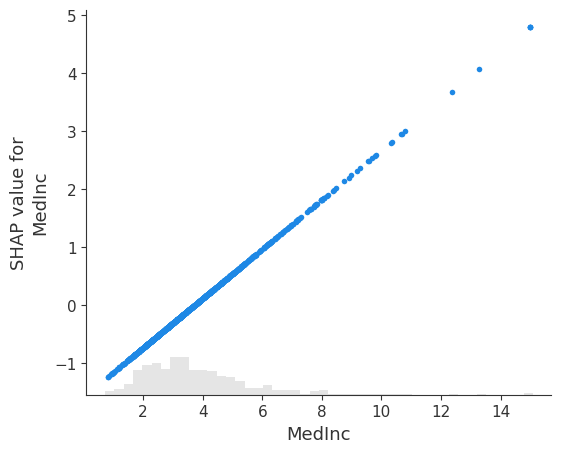

In [10]:
shap.plots.scatter(shap_values_ex[:, "MedInc"])

## Compute Shapley Values

In [11]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer(tat_train)

In [ ]:
shap_values

.values =
array([[[ 3.01520481e-05,  3.55445128e-04, -1.38912120e-04,
         -1.26167945e-05, -2.34068261e-04],
        [-2.87957085e-04, -1.20615190e-04, -7.94316436e-05,
         -3.64849865e-05,  5.24488905e-04],
        [-1.40570604e-04,  2.51474553e-05,  6.53382558e-05,
         -4.35430387e-05,  9.36279319e-05],
        ...,
        [ 1.05198357e-04,  1.97521500e-04,  1.16592147e-04,
         -1.25812587e-06, -4.18053878e-04],
        [ 2.92714417e-06,  5.88716213e-05, -3.05445626e-05,
         -3.64358488e-07, -3.08898444e-05],
        [ 2.82507245e-06,  4.83767742e-05,  6.67521351e-06,
          6.38197684e-07, -5.85152578e-05]],

       [[ 3.01520481e-05,  3.55445128e-04, -1.38912120e-04,
         -1.26167945e-05, -2.34068261e-04],
        [-2.87957085e-04, -1.20615190e-04, -7.94316436e-05,
         -3.64849865e-05,  5.24488905e-04],
        [-1.40570604e-04,  2.51474553e-05,  6.53382558e-05,
         -4.35430387e-05,  9.36279319e-05],
        ...,
        [ 1.05198357e-04, 

In [ ]:
shap.plots.beeswarm(shap_values)

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (4000, 5)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.